In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [59]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [60]:
# loading the dataset to a Pandas DataFrame
df = pd.read_csv(r"C:\Users\CHINMAY\Documents\OneNote Notebooks\creditcard.csv\creditcard.csv")

In [61]:
df.shape

(284807, 31)

In [62]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [63]:
# dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [64]:
# checking the number of missing values in each column
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [65]:
# distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### visualizing the imbalanced distribution

<Figure size 72x72 with 0 Axes>

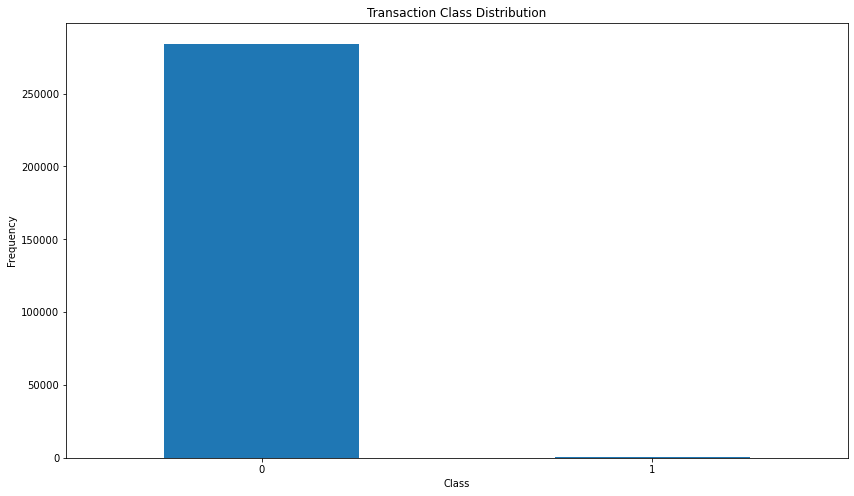

<Figure size 72x72 with 0 Axes>

In [66]:
c_class = pd.value_counts(df['Class'], sort = True)

c_class.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2))

plt.xlabel("Class")

plt.ylabel("Frequency")
plt.figure(figsize=(1,1))

In [67]:
## Get the Fraud and the normal dataset 

fraud = df[df['Class']==1]

normal = df[df['Class']==0]

In [77]:
# statistical measures of the data
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [78]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [79]:
# compare the values for both transactions
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### since data is imbalanced, we can use undersampling to improve accuracy and model performance
##### we will make number of entries for noram transcation equal to that of fraud transactions
##### Number of Fraudulent Transactions --> 492

In [80]:
legit_sample = normal.sample(n=492)

In [81]:
#Concatenating two DataFrames
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [82]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
52516,45499.0,-1.516604,1.555448,0.452708,-1.431217,-0.724522,-0.693291,-0.239517,0.951035,-0.211014,...,-0.046897,-0.205539,0.050058,0.056895,-0.060788,0.737706,0.146923,0.039983,7.68,0
23190,32631.0,1.038058,-0.593532,0.007008,-0.838633,-0.423080,-0.102952,-0.089684,0.078798,1.240772,...,-0.082353,-0.167920,-0.160845,-0.276231,0.601180,-0.590979,0.043465,0.018584,96.44,0
278002,167983.0,2.171024,-0.388374,-1.886443,-0.854993,0.084199,-0.850467,-0.210317,-0.249366,-0.959405,...,0.020977,0.083757,0.185802,0.696461,0.006550,-0.338101,-0.027627,-0.036155,15.00,0
164363,116662.0,-0.358181,-0.786569,1.124803,-2.581316,-0.896437,-0.145972,-0.034730,-0.026193,-2.009447,...,-0.033743,0.087527,0.098114,0.690717,-0.056278,-0.194638,0.090582,0.142903,113.00,0
172813,121248.0,-0.331741,-0.543830,-0.596394,-1.615392,0.987250,-1.336291,0.652424,-0.247348,-1.807478,...,0.540320,1.158220,-0.009820,-0.377619,-0.318510,-0.032569,0.103116,0.192141,72.60,0


In [83]:
new_dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [107]:
#Splitting* the data into Features & Targets

X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [108]:
#spllitting data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


### data preprossessing using standard scalar 

In [109]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scalar.fit_transform(X)


array([[-0.90014877,  0.16630928, -0.07449682, ...,  0.05311455,
         0.00794328, -0.41990729],
       [-1.16564854,  0.63125953, -0.65522924, ..., -0.04946746,
        -0.04089533, -0.02580025],
       [ 1.62700958,  0.83745999, -0.59978796, ..., -0.11995724,
        -0.16582712, -0.38740545],
       ...,
       [ 1.65523493,  0.31927379, -0.1904504 , ...,  0.28928356,
         0.36028242, -0.10816489],
       [ 1.66792395, -0.12438724, -0.33651358, ...,  0.78482182,
        -0.66233312,  0.63382731],
       [ 1.67580559,  0.80487322, -0.45200937, ..., -0.0896022 ,
        -0.11825   , -0.26516833]])

#### model training using SVM 

In [110]:
from sklearn.svm import SVC

model = SVC()

In [111]:
# training the SVC with Training Data
model.fit(X_train, Y_train)

SVC()

### SVM model evaluation using accuracy score and classification matrix

In [112]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [113]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.5451080050825922


In [114]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [115]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.5532994923857868


In [128]:
#classification report

c_class = classification_report(X_test_prediction, Y_test)
print('classification report on Test Data : \n', c_class)

classification report on Test Data : 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       105
           1       0.92      0.98      0.95        92

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



### model training using logistic regression 


In [122]:
model = LogisticRegression()

# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression()

###  logistic regression model evaluation using accuracy score and classification matrix 

In [123]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [124]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9440914866581956


In [125]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [126]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.949238578680203


In [130]:
#classification report

c_class = classification_report(X_test_prediction, Y_test)
print('classification report on Test Data : \n', c_class)

classification report on Test Data : 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95       105
           1       0.92      0.98      0.95        92

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



### confusion matrix and heatmap

In [133]:
from sklearn.metrics import confusion_matrix
cf_metrix = confusion_matrix(X_test_prediction, Y_test)

<AxesSubplot:>

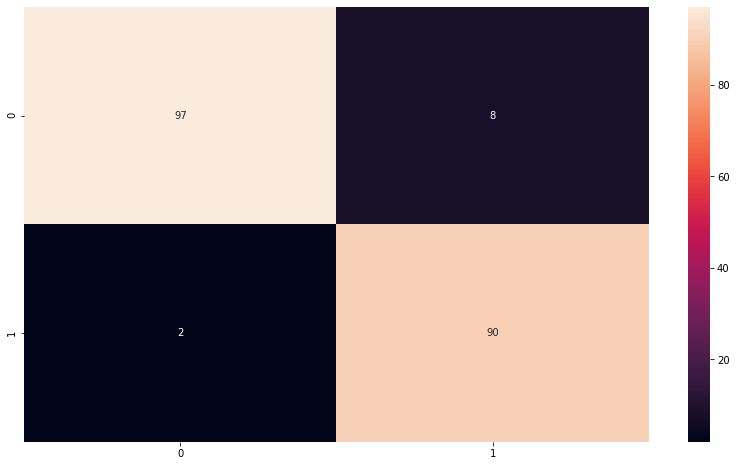

In [134]:
sns.heatmap(cf_metrix, annot=True)